# 2019/01/22    - test campaign 1, day 6 (Tuesday. Monday was MLK day)

## 3.8 Measure M1 and M3 influence functions (M1 IF 16-30 only; no M3)
## 3.9 Optimize M1-M3-M1 figure (5 iterations)
Note that Previous optimizations were using M1 only. This is where we started M1-M3-M1 optimization. And for this round, we got rid of the additional forces on the quads, hoping the global optimization may dilute the dips.

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob

%matplotlib inline
plt.jet()

dateID = 190122
testID = '3-8' 

<Figure size 432x288 with 0 Axes>

## We finished up first 30 influence functions by doing M1 16-30
Results have been presented in 190118.ipynb

In [2]:
import pandas as pd
pattern = '%s/Processed/%d_%s Influence Functions/*filename list.xlsx'%(
    dataDir, dateID-4, testID)
summaryFile = glob.glob(pattern)[0]
df = pd.read_excel(summaryFile, sheet_name = 'Corrected Maps', skiprows=1)
idx = np.unique(df['Actuator'], return_index=True)[1]
mode2actID = [df['Actuator'][idx] for idx in sorted(idx)]

3-8 Influence function 16 --- Actuator 128 --- irow = 0, icol = 0, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+16-1 burst50 morph -.h5: Tue Jan 22 08:49:13 2019 
3-8 Influence function 16 --- Actuator 128 --- irow = 0, icol = 1, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if-16-1 burst50 morph -.h5: Tue Jan 22 08:52:26 2019 
3-8 Influence function 16 --- Actuator 128 --- irow = 0, icol = 2, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if-16-2 burst50 morph -.h5: Tue Jan 22 08:55:28 2019 
3-8 Influence function 16 --- Actuator 128 --- irow = 0, icol = 3, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+16-2 burst50 morph -.h5: Tue Jan 22 08:58:41 2019 
3-8 Influence function 17 --- Actuator 130 --- irow = 1, icol = 0, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+17-1 burst50 morph -.h5: Tue Jan 22 09:02:04 2019 
3-8 Influence function 17 --- Actuator 130 --- irow = 1, icol = 1

3-8 Influence function 28 --- Actuator 316 --- irow = 12, icol = 3, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+28-2 burst50 morph -.h5: Tue Jan 22 11:39:45 2019 
3-8 Influence function 29 --- Actuator 114 --- irow = 13, icol = 0, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+29-1 burst50 morph -.h5: Tue Jan 22 11:43:06 2019 
3-8 Influence function 29 --- Actuator 114 --- irow = 13, icol = 1, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if-29-1 burst50 morph -.h5: Tue Jan 22 11:46:24 2019 
3-8 Influence function 29 --- Actuator 114 --- irow = 13, icol = 2, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if-29-2 burst50 morph -.h5: Tue Jan 22 11:49:31 2019 
3-8 Influence function 29 --- Actuator 114 --- irow = 13, icol = 3, -----------------------------
/Processed/190122_3-8/190122 3-8 M1 if+29-2 burst50 morph -.h5: Tue Jan 22 11:52:48 2019 
3-8 Influence function 30 --- Actuator 108 --- irow = 14, ic

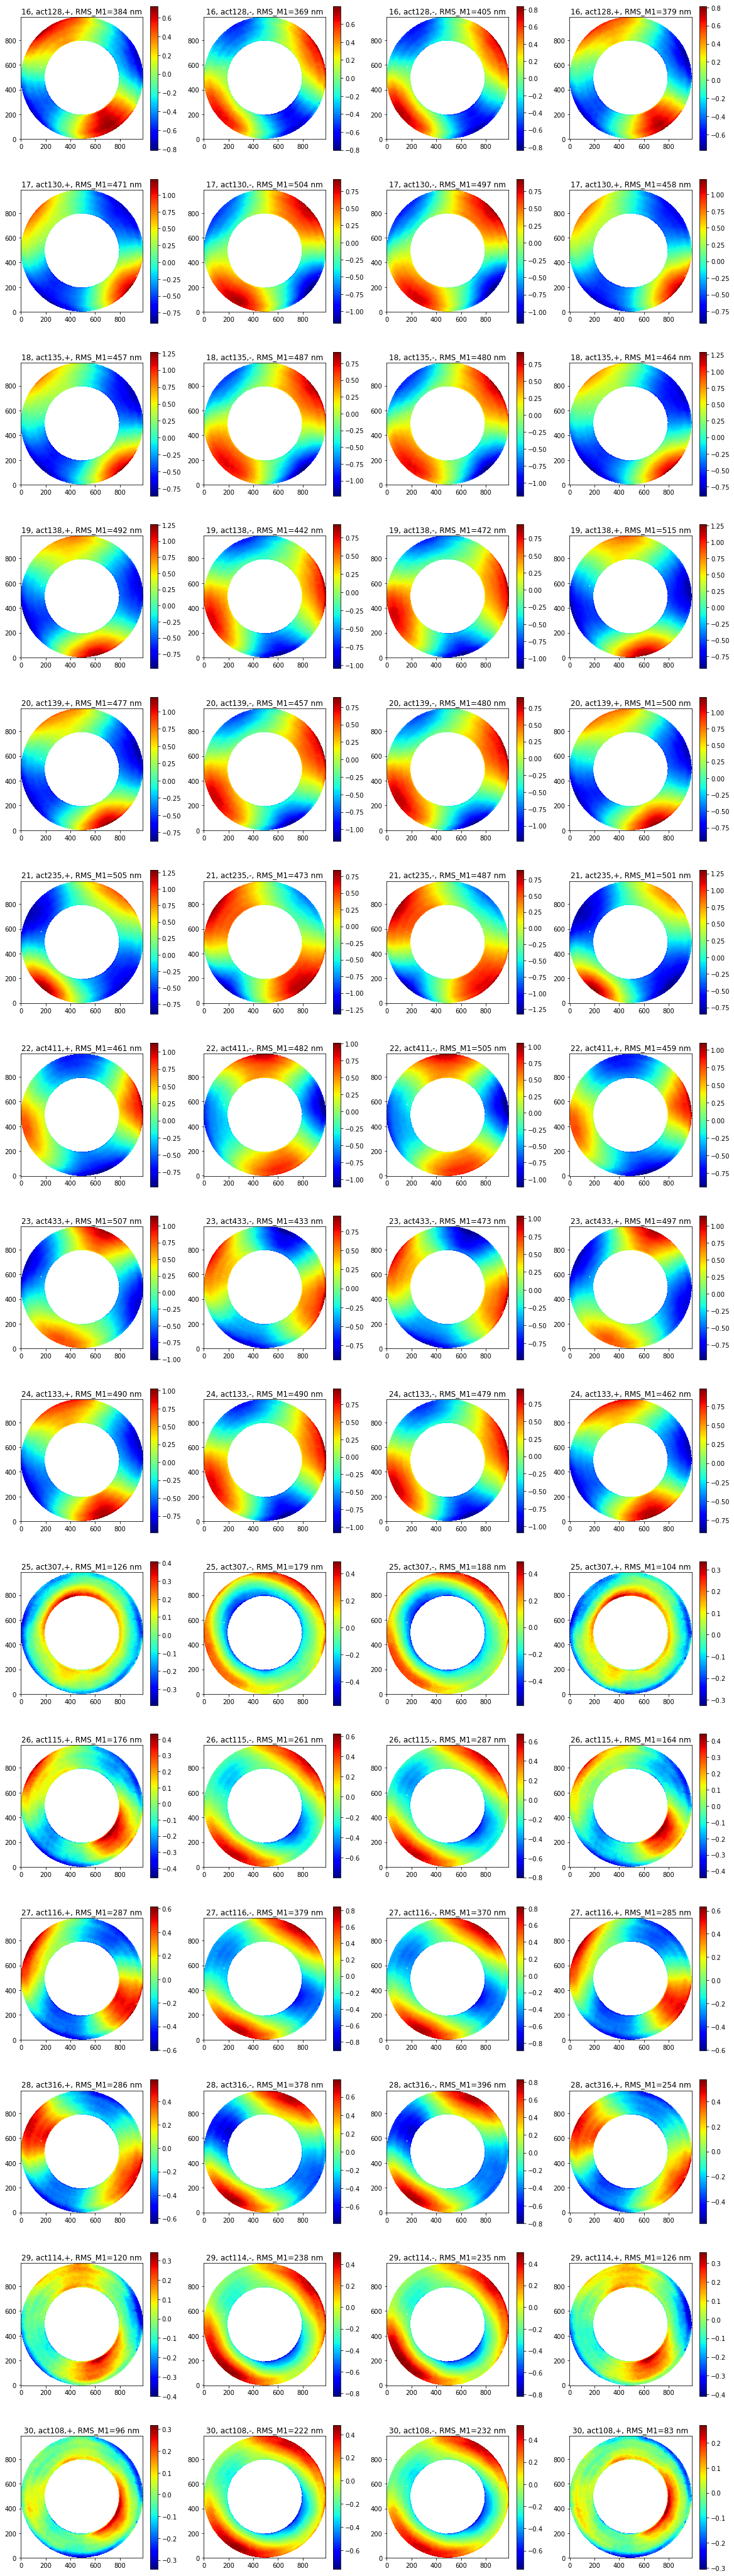

In [3]:
fig, ax = plt.subplots(15,4,figsize=(20,5*15))
i = 0
for modeID in range(16,31):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[modeID-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M1 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[modeID-1], bend[0], m1rms))

## M1M3 global optimization

3-9 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190122_3-9/M1M3 set0 190122 3-9.h5: date not in h5 file. 
/Processed/190122_3-9/M1M3 set0 190122 3-9.h5: date not in h5 file. 
3-9 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190122_3-9/M1M3 set1 190122 3-9.h5: date not in h5 file. 
/Processed/190122_3-9/M1M3 set1 190122 3-9.h5: date not in h5 file. 
3-9 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190122_3-9/M1M3 set2 190122 3-9.h5: date not in h5 file. 
/Processed/190122_3-9/M1M3 set2 190122 3-9.h5: date not in h5 file. 
3-9 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190122_3-9/M1M3 set3 190122 3-9.h5: date not in h5 file. 
/Processed/190122_3-9/M1M3 set3 190122 3-9.h5: date not in h5 file. 
3-9 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190122_3-9/M1M3 set4 190122 3-9.h5: date not in h5 file. 
/Processed/190122_3-9/M1M3 set4 190122 3-9.h

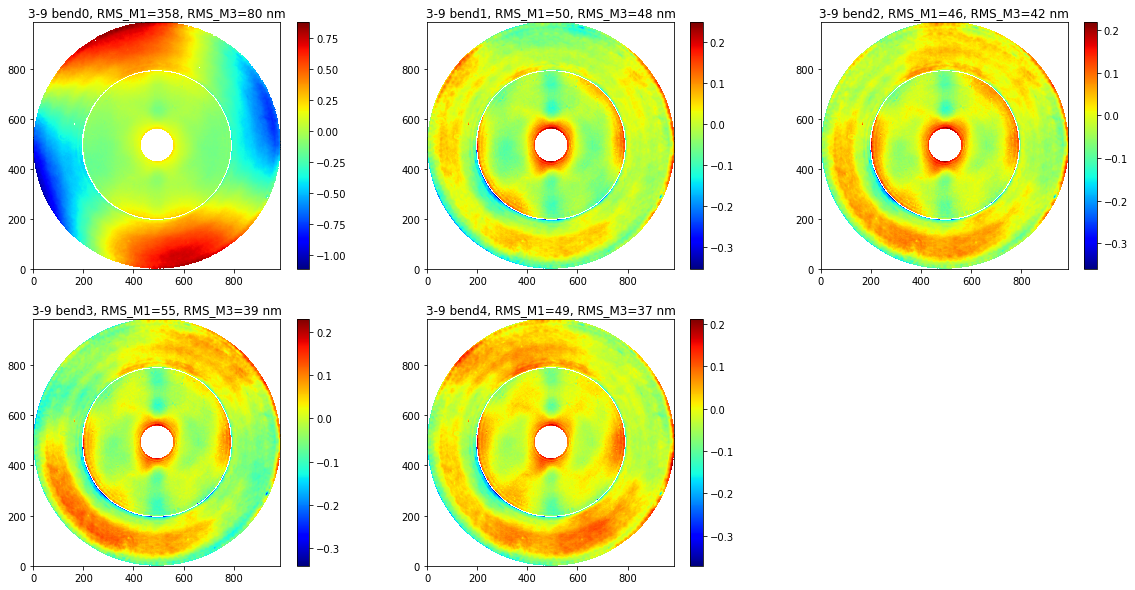

In [6]:
testID = '3-9'
fig, ax = plt.subplots(2,3,figsize=(20,10))
i = 0
for bend in range(5):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
fig.delaxes(ax.flatten()[5])    

## What bending modes did we use in the optimization?

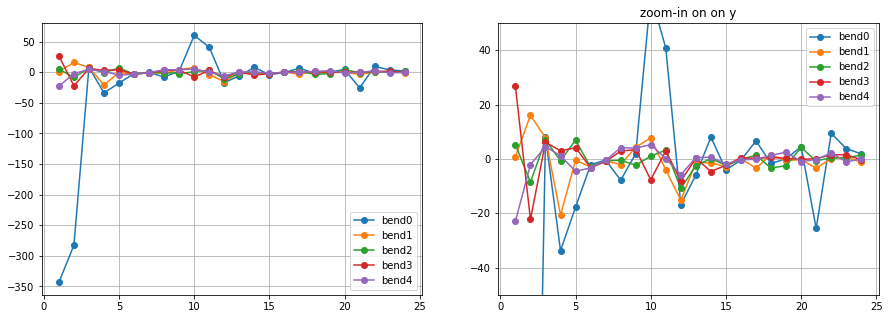

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(5):
    csvName = '%s/Processed/%d_%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, bend, dateID, testID)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])